In [195]:
library(xts)
library(zoo)
library(ggplot2)
library(scales)

In [22]:
filename <- '202002-baywheels-tripdata.csv'
zip <- paste(filename, '.zip', sep='')
download.file(paste('https://s3.amazonaws.com/baywheels-data/', zip, sep=''), zip)
unzip(zip)
unlink(zip)

In [139]:
data <- read.csv('202002-baywheels-tripdata.csv')
data$start_time = as.POSIXct(data$start_time, tz='America/San_Francisco')
data$end_time = as.POSIXct(data$end_time, tz='America/San_Francisco')
data$jed = 1

In [140]:
head(data)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,jed
,<int>,<dttm>,<dttm>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<fct>,<dbl>
1,62083,2020-02-29 18:32:30,2020-03-01 11:47:14,176,MacArthur BART Station,37.82841,-122.2663,267,Derby St at College Ave,37.86180,-122.2536,1993,Customer,,1
2,1364,2020-02-29 23:53:53,2020-03-01 00:16:37,375,Grove St at Masonic Ave,37.77484,-122.4465,506,7th Ave at Clement St,37.78244,-122.4654,12402,Customer,,1
3,836,2020-02-29 23:54:03,2020-03-01 00:07:59,375,Grove St at Masonic Ave,37.77484,-122.4465,454,7th Ave at Cabrillo St,37.77518,-122.4650,2302,Customer,,1
4,1004,2020-02-29 23:48:34,2020-03-01 00:05:19,179,Telegraph Ave at 27th St,37.81607,-122.2679,200,2nd Ave at E 18th St,37.80021,-122.2538,902,Customer,,1
5,1007,2020-02-29 23:48:25,2020-03-01 00:05:13,179,Telegraph Ave at 27th St,37.81607,-122.2679,200,2nd Ave at E 18th St,37.80021,-122.2538,11578,Customer,,1
6,338,2020-02-29 23:57:43,2020-03-01 00:03:22,182,19th Street BART Station,37.80937,-122.2680,178,Broadway at 30th St,37.81938,-122.2619,3545,Customer,,1


In [141]:
xts <- xts(data$jed, data$start_time) 
ends <- endpoints(xts,'hours',2)
aggr <- period.apply(xts,ends, sum)
df <- fortify(aggr)
names(df)[1] <- "time"
names(df)[2] <- "count"
head(df)

,time,count
,<dttm>,<dbl>
1,2020-02-01 01:59:55,296
2,2020-02-01 03:54:18,123
3,2020-02-01 05:56:56,47
4,2020-02-01 07:59:44,201
5,2020-02-01 09:59:50,849
6,2020-02-01 11:59:52,1722


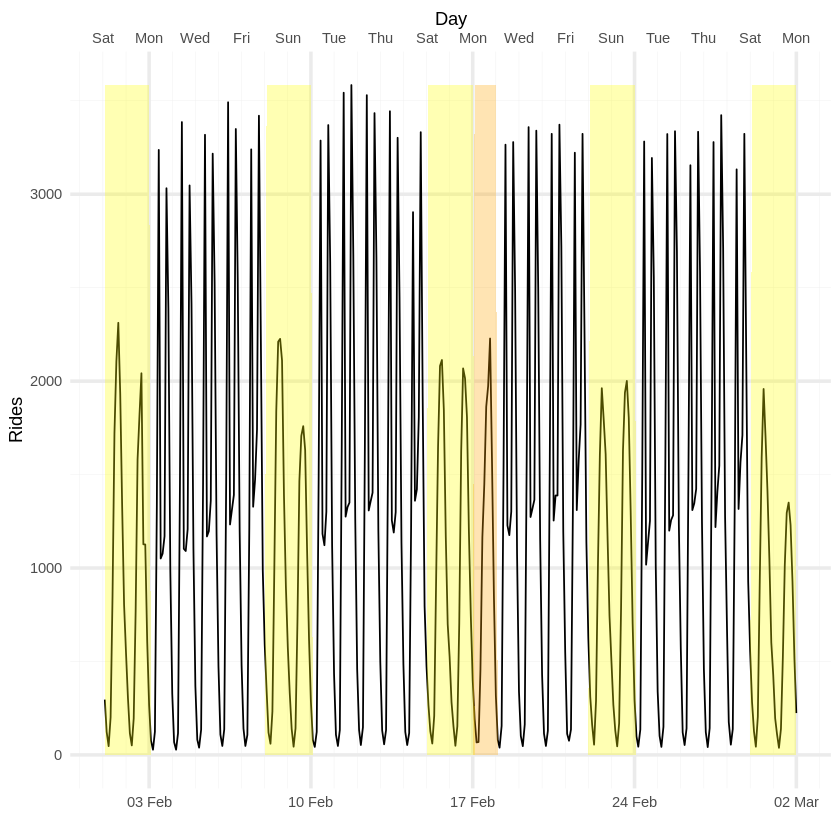

In [242]:
p <- ggplot(df, aes(x=time, y=count)) +
  geom_line() + 
  ylab("Rides") + 
  xlab("") +
  theme_minimal() + 
  geom_area(aes(y=weekend*max(count)), fill="yellow", alpha=0.3) +
  geom_area(aes(y=president_day*max(count)), fill="orange", alpha=0.3) +
  theme(panel.grid.minor = element_line(size = 0.1), panel.grid.major = element_line(size = 1)) +  
  scale_x_datetime(date_labels = "%d %b", breaks=date_breaks('week'), minor_breaks = date_breaks('day'),                     
                   sec.axis = dup_axis(name = "Day",  breaks = date_breaks('2 day'), labels = scales::time_format("%a")))

p

In [245]:
ggsave("rides.jpg", width = 8, height = 4)